# External factor analysis on fresh fruit bunch (FFB) yield

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("seaborn")

%matplotlib inline

## Load data & EDA

In [2]:
df = pd.read_csv("palm_ffb.csv", parse_dates=[0], index_col="Date")
df.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
Date,,,,,,,,
2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2008-01-01 to 2018-01-10
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    int64  
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SoilMoisture,130.0,527.646923,57.367844,380.700000,488.625000,538.300000,571.025000,647.3000
Average_Temp,130.0,26.849918,0.651413,25.158065,26.442285,26.930645,27.270726,28.5800
Min_Temp,130.0,21.379231,0.688971,18.900000,21.000000,21.500000,21.800000,22.6000
Max_Temp,130.0,33.851538,1.079638,31.100000,33.100000,33.900000,34.600000,36.0000
Precipitation,130.0,188.980769,80.237210,2.000000,140.300000,182.150000,226.100000,496.1000
Working_days,130.0,24.753846,1.239289,21.000000,24.000000,25.000000,26.000000,27.0000
HA_Harvested,130.0,793404.491565,34440.893854,683431.944400,768966.949100,790036.158050,821989.235250,882254.2254
FFB_Yield,130.0,1.602231,0.281751,1.080000,1.390000,1.585000,1.807500,2.2700


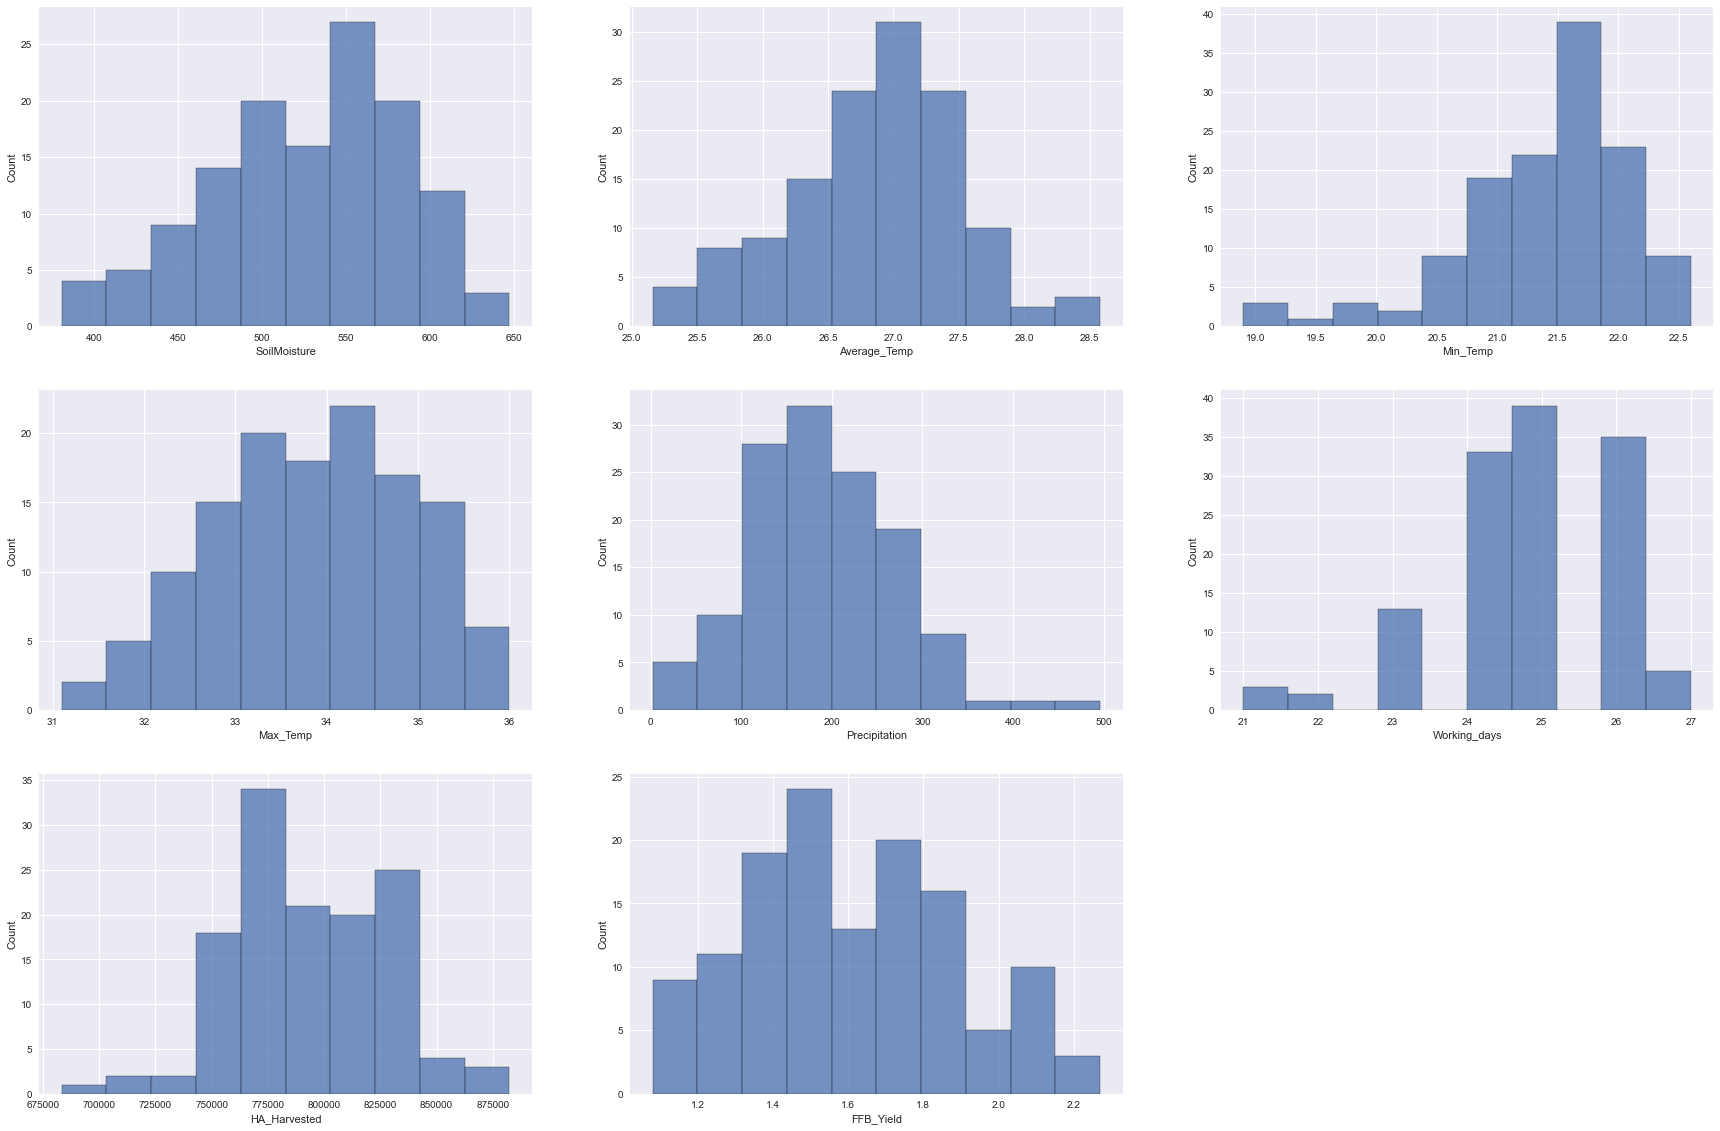

In [5]:
# visual normality check
plt.figure(figsize=(30, 20))
for idx, col in enumerate(df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(df, x=col, bins=10)
plt.show()

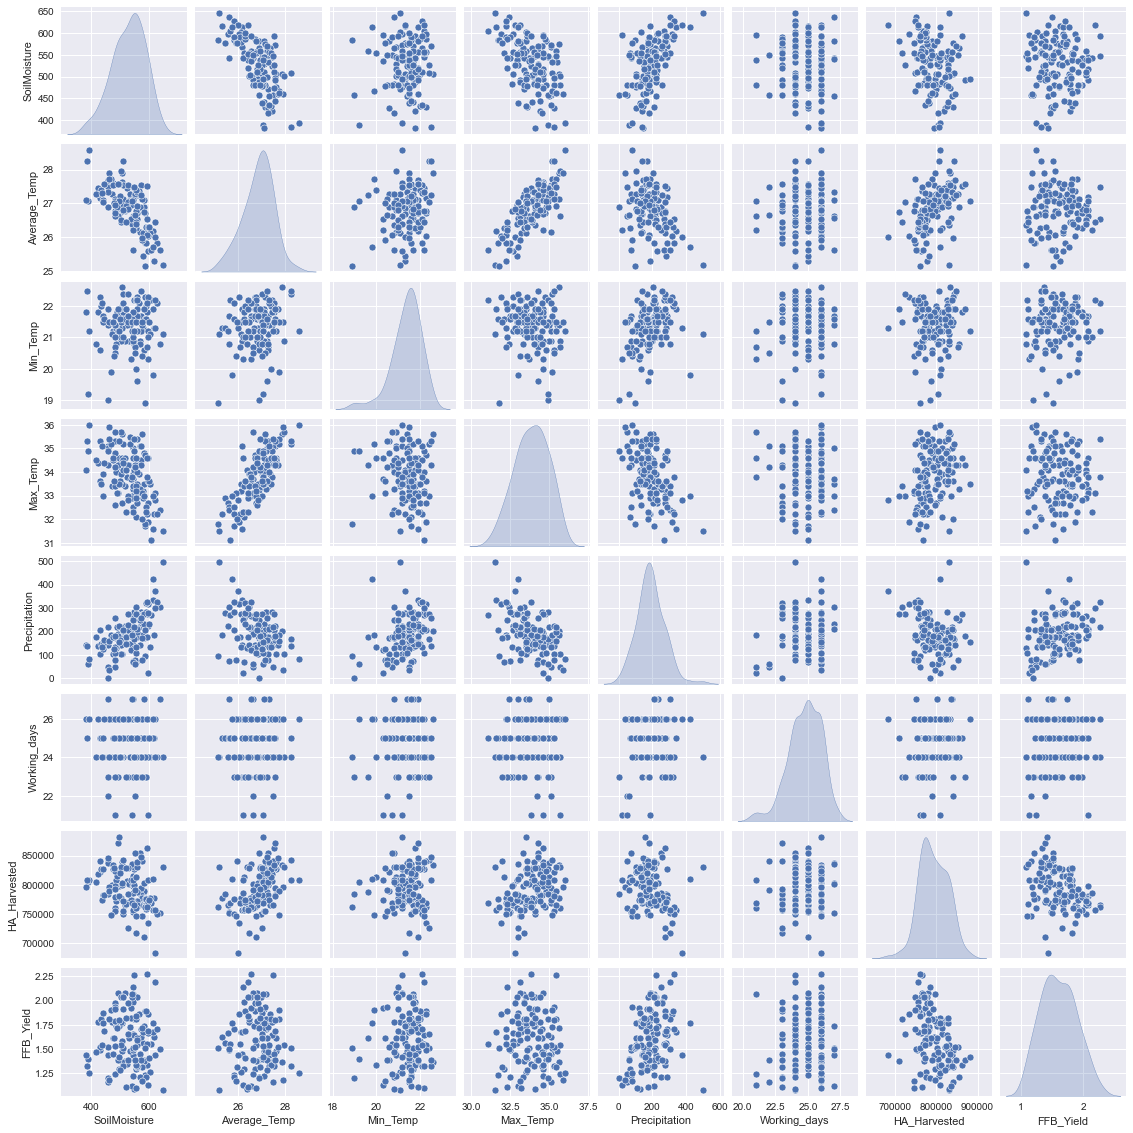

In [6]:
# pairwise relationship plot
sns.pairplot(df, diag_kind="kde",height=2.0)

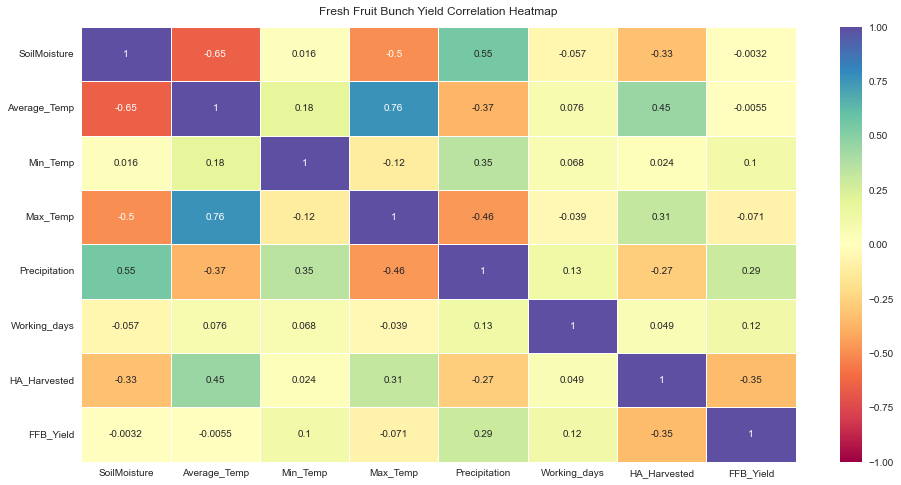

In [7]:
# correlation heatmap
plt.figure(figsize=(16, 8))
corr = df.corr(method="pearson")
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap="Spectral");
heatmap.set_title('Fresh Fruit Bunch Yield Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Here are the groups of observed correlation:
* Positive (high/mild) correlation:
  * SoilMoisture & Precipitation
  * Average_Temp & HA_Harvested
  * Max_Temp & Average_Temp
* Negative (low/mild) correlation:
  * SoilMoisture & Average_Temp/Max_Temp
  * Precipitation & Average_Temp/Max_Temp
* Uncorrelated
  * Other combinations